<a href="https://colab.research.google.com/github/sgparrot/sgparrot2021Lv1-1/blob/main/Simpsons%20/%20Sympsons(2%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import cv2

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# **최종 제출 형식**

In [3]:
import io
y_test_list = pd.read_csv('/content/drive/MyDrive/test_sample.csv',index_col=0)
y_test_list.head(10)

,files,pred
0,test10013.jpg,
1,test10019.jpg,
2,test10028.jpg,
3,test10074.jpg,
4,test10084.jpg,
5,test10102.jpg,
6,test10150.jpg,
7,test10153.jpg,
8,test10172.jpg,
9,test10186.jpg,


# **데이터 불러오기**

Google drive에 업로드 후 드라이브 마운트 

* 압축 풀기

    !unzip (압축 해제할 파일).zip -d (압축 해제 파일 저장 경로)

In [ ]:
!unzip /content/drive/MyDrive/simpson_data_set/simpsons_dataset-20210509T105542Z-001.zip -d "/content/drive/MyDrive/simpson_data_set"

* target 확인 & category

In [4]:
import os 
from keras.preprocessing import image
import glob
import cv2 as cv

In [5]:
train_path = '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train'

In [6]:
#train 폴더 속 하위 폴더 -> target 확인

target = os.listdir(train_path)


target.sort()

print("target : ", target)

print("Number of targets : ",len(target))


target :  ['bart', 'charles_montgomery', 'krusty', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner']
Number of targets :  9


In [7]:
#category

category = {}
for i, name in enumerate(target):
    category[i]= name


category

{0: 'bart',
 1: 'charles_montgomery',
 2: 'krusty',
 3: 'lisa_simpson',
 4: 'marge_simpson',
 5: 'milhouse_van_houten',
 6: 'moe_szyslak',
 7: 'ned_flanders',
 8: 'principal_skinner'}

 bart 데이터 확인


In [7]:
condition = '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/*.jpg'

bart = glob.glob(condition)
bart.sort()

print("Number of Bart images : ", len(bart))
print("Bart image file path (to the 9th) : ", bart[:9])


Number of Bart images :  1218
Bart image file path (to the 9th) :  ['/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0000.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0001.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0002.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0003.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0004.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0005.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0006.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0007.jpg', '/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/bart/pic_0008.jpg']


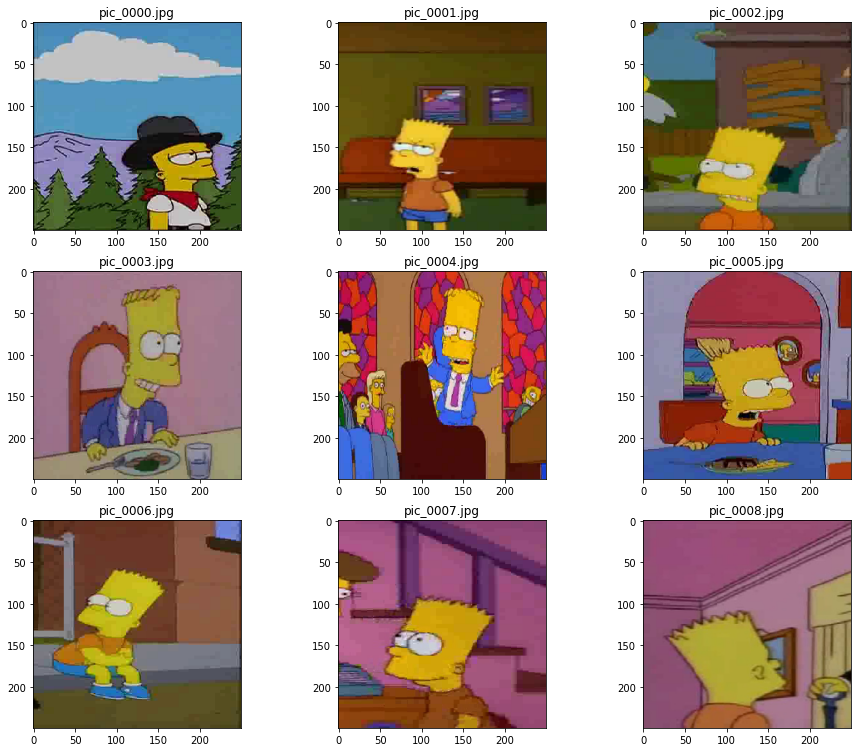

In [12]:

fig = plt.figure(figsize=(20,10))
for i, path in enumerate(bart[:9]) :
    img = image.load_img(path, target_size=(250, 250))
    plt.subplot(3,3,i+1)
    plt.imshow(img)

    #이미지 제목 지정
    name = path.split('/')
    name = name[-1]
    plt.title(name)

plt.subplots_adjust(left = 0.3, bottom = -0.1)
plt.show()



    

### **Generating Train Set**


In [ ]:
X_train_list = []
y_train_list = []

for key,value in category.items() :

    images =  glob.glob("/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train/{0}/*.jpg".format(value))
    images.sort()

    for image in images : 

        image_bgr = cv2.imread(image)
        image_rgb = cv2. cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_reshaped = cv2.resize(image_rgb, dsize = (224,224), interpolation = cv2.INTER_AREA)

        X_train_list.append(image_reshaped)
        y_train_list.append(key)





In [ ]:
#array형식으로 변경

X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

In [ ]:
#npz파일로 저장

np.savez("/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train_224_npz",
          X_train_npz=X_train, y_train_npz=y_train)

### **Generating Test Set**

In [ ]:
images = glob.glob("/content/drive/MyDrive/simpson_data_set/simpsons_dataset/test/*.jpg")
images.sort()

X_test_list = [] 

for image in images : 
    image_bgr = cv2.imread(image)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_reshaped = cv2.resize(image_rgb, dsize=(224, 224), interpolation=cv2.INTER_AREA)

    X_test_list.append(image_reshaped)

In [ ]:
#앞의 최종 제출 형식에서와 동일
y_test_list = pd.read_csv(io.BytesIO(uploaded['test_sample.csv']),index_col=0)

#array 형식으로 변경
X_test = np.array(X_test_list)
y_test = np.array(y_test_list["files"])

In [ ]:
np.savez("/content/drive/MyDrive/simpson_data_set/simpsons_dataset/test_224_npz",
         X_test_npz = X_test, y_test_npz=y_test)

### **저장된 npz파일 불러오기**

In [8]:
train_dataset = np.load("/content/drive/MyDrive/simpson_data_set/simpsons_dataset/train_224_npz.npz")
test_dataset = np.load("/content/drive/MyDrive/simpson_data_set/simpsons_dataset/test_224_npz.npz")

In [9]:
X_train = train_dataset["X_train_npz"]
y_train = train_dataset["y_train_npz"]

y_train = to_categorical(y_train, len(target))
print("y_train example : ", y_train)

y_train example :  [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
X_test = test_dataset["X_test_npz"]
y_test = np.array(y_test_list["files"])

In [11]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))   # 아직 미정

X_train shape: (11248, 224, 224, 3)
y_train shape: (11248, 9)
X_test shape: (1086, 224, 224, 3)
y_test shape: (1086,)


### **split & augmentation**

In [15]:
#검증에 사용할 데이터 생성

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (8998, 224, 224, 3)
X_val shape: (2250, 224, 224, 3)
y_train shape: (8998, 9)
y_val shape: (2250, 9)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, #좌우반전
        fill_mode='nearest')

In [ ]:
datagen.fit(X_train)

### **모델 불러오기**

In [12]:
from keras.applications import vgg16

# VGG16 모델 불러오기
vgg = vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (224,224,3))


vgg.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [13]:
# Convolution Layer를 학습되지 않도록 고정 
for layer in vgg.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = Sequential()

for layer in vgg.layers:
    layer.trainable = False


# VGG16모델의 위 vgg를 추가
model.add(vgg)
 
# 모델의 Fully Connected 부분을 재구성
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(target), activation='softmax'))

# 모델
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 9225      
Total params: 40,415,049
Trainable params: 25,700,361
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])



# 모델 학습
history = model.fit(X_train, y_train, batch_size = 32, validation_data=(X_val,y_val), epochs=50)
 

Epoch 1/50
282/282 [==============================] - 126s 309ms/step - loss: 25.8441 - acc: 0.4475 - val_loss: 1.0027 - val_acc: 0.7191
Epoch 2/50
282/282 [==============================] - 82s 289ms/step - loss: 1.0169 - acc: 0.7030 - val_loss: 0.7737 - val_acc: 0.7764
Epoch 3/50
282/282 [==============================] - 81s 289ms/step - loss: 0.8392 - acc: 0.7477 - val_loss: 0.7081 - val_acc: 0.7871
Epoch 4/50
282/282 [==============================] - 81s 289ms/step - loss: 0.7553 - acc: 0.7859 - val_loss: 0.6836 - val_acc: 0.7933
Epoch 5/50
282/282 [==============================] - 81s 289ms/step - loss: 0.7294 - acc: 0.7824 - val_loss: 0.7001 - val_acc: 0.8133
Epoch 6/50
282/282 [==============================] - 81s 289ms/step - loss: 0.7332 - acc: 0.7974 - val_loss: 0.6376 - val_acc: 0.8244
Epoch 7/50
282/282 [==============================] - 81s 289ms/step - loss: 0.6479 - acc: 0.8193 - val_loss: 0.6804 - val_acc: 0.8298
Epoch 8/50
282/282 [==============================] -

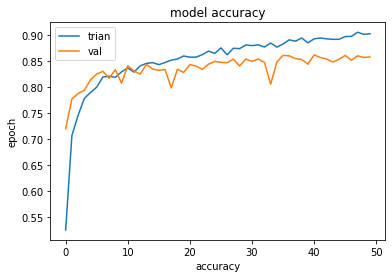

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['trian','val'], loc='upper left')
plt.show()